In [1]:
%matplotlib inline
import module
from module import *
reload(module=module);

## Loading movie ratings dataset

In [2]:
#  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 
#  943 users
#
#  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
#  rating to movie i
movies = loadmat('movies.mat')
Y = movies['Y']
R = movies['R']

In [3]:
print('Average rating for movie 1 (Toy Story): %f ' % np.mean(Y[0, R[0, :]]))

Average rating for movie 1 (Toy Story): 4.520679 


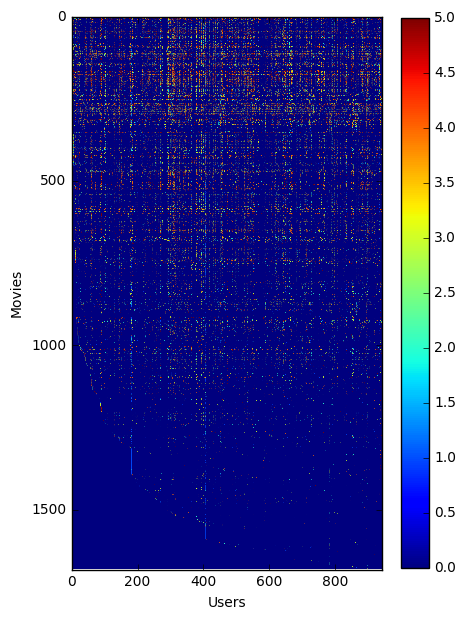

In [4]:
#  We can "visualize" the ratings matrix by plotting it with imshow
fig = plt.figure(figsize=(5,10))
plt.imshow(Y)
plt.colorbar(shrink=0.71)
plt.ylabel('Movies')
plt.xlabel('Users');

##  Collaborative Filtering Cost Function

In [5]:
params = loadmat('movieParams.mat')
Theta = params['Theta']
X = params['X']

In [6]:
#  Reduce the data set size so that this runs faster
num_users = 4; num_movies = 5; num_features = 3

In [7]:
X = X[:num_movies, :num_features]
Theta = Theta[:num_users, :num_features]
Y = Y[:num_movies, :num_users]
R = R[:num_movies, :num_users]

In [8]:
#  Evaluate cost function
J1,grad = cofiCostFunc(np.hstack([X.ravel() , Theta.ravel()]), Y, R, num_users, num_movies, \
               num_features, 0)
J2,grad = cofiCostFunc(np.hstack([X.ravel() , Theta.ravel()]), Y, R, num_users, num_movies, \
               num_features, 1.5)



In [9]:
print(J1,J2)

22.2246037257 31.3440562443


##  Entering ratings for a new user

In [10]:
movieList = loadMovieList()

In [11]:
#  Initialize my ratings
my_ratings = np.zeros([1682, 1])

In [12]:
my_ratings[6] = 3
my_ratings[11]= 5
my_ratings[53] = 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354]= 5

##  Learning Movie Ratings

In [13]:
movies = loadmat('movies.mat')
Y = movies['Y']
R = movies['R']

In [14]:
#  Add our own ratings to the data matrix
Y = np.hstack([my_ratings, Y])
R = np.hstack([(my_ratings != 0), R])

In [15]:
#  Normalize Ratings
Ynorm, Ymean = normalizeRatings(Y, R)

In [16]:
#  Useful Values
num_movies, num_users = Y.shape
num_features = 10

In [17]:
# Set Initial Parameters (Theta, X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)
initial_parameters = np.hstack([X.ravel(), Theta.ravel()])

In [18]:
fun = lambda x: cofiCostFunc(x,Ynorm,R,num_users,num_movies,num_features,10)[0]
grad = lambda x: cofiCostFunc(x,Ynorm,R,num_users,num_movies,num_features,10)[1]

In [19]:
theta = fmincg(f=fun, x0=initial_parameters, fprime=grad, maxiter=1000)

Optimization terminated successfully.
         Current function value: 38949.208227
         Iterations: 660
         Function evaluations: 997
         Gradient evaluations: 997


In [20]:
# Unfold the returned theta back into U and W
X = np.reshape(theta[:num_movies*num_features], [num_movies, num_features])
Theta = np.reshape(theta[num_movies*num_features:], \
                [num_users, num_features])

##  Recommendation for you

In [21]:
p = X.dot(Theta.T)
my_predictions = p[:,0].reshape([-1,1]) + Ymean

In [22]:
movieList = loadMovieList()

ix = np.argsort(my_predictions,axis=0)[::-1]

print('Top recommendations for you:')
for i in range(10):
    j = ix[i][0]
    print('Predicting rating {0:.1f} for movie {1:s}'.format(my_predictions[j][0], movieList[j]))


print('\n\nOriginal ratings provided:')
for i in range(len(my_ratings)):
    if my_ratings[i][0] > 0: 
        print('Rated {0:.1f} for {1:s}'.format(my_ratings[i][0], movieList[i]))


Top recommendations for you:
Predicting rating 5.0 for movie Prefontaine
Predicting rating 5.0 for movie Star Kid
Predicting rating 5.0 for movie Entertaining Angels: The Dorothy Day Story
Predicting rating 5.0 for movie Santa with Muscles
Predicting rating 5.0 for movie Saint of Fort Washington, The
Predicting rating 5.0 for movie Great Day in Harlem, A
Predicting rating 5.0 for movie They Made Me a Criminal
Predicting rating 5.0 for movie Marlene Dietrich: Shadow and Light (1996)
Predicting rating 5.0 for movie Someone Else's America
Predicting rating 5.0 for movie Aiqing wansui


Original ratings provided:
Rated 3.0 for Twelve Monkeys
Rated 5.0 for Usual Suspects, The
Rated 4.0 for Outbreak
Rated 5.0 for Shawshank Redemption, The
Rated 3.0 for While You Were Sleeping
Rated 5.0 for Forrest Gump
Rated 4.0 for Alien
Rated 5.0 for Die Hard 2
Rated 5.0 for Sphere
